## Fit with real and imm parts

In [2]:
import numpy as np
from matplotlib import pyplot as plt


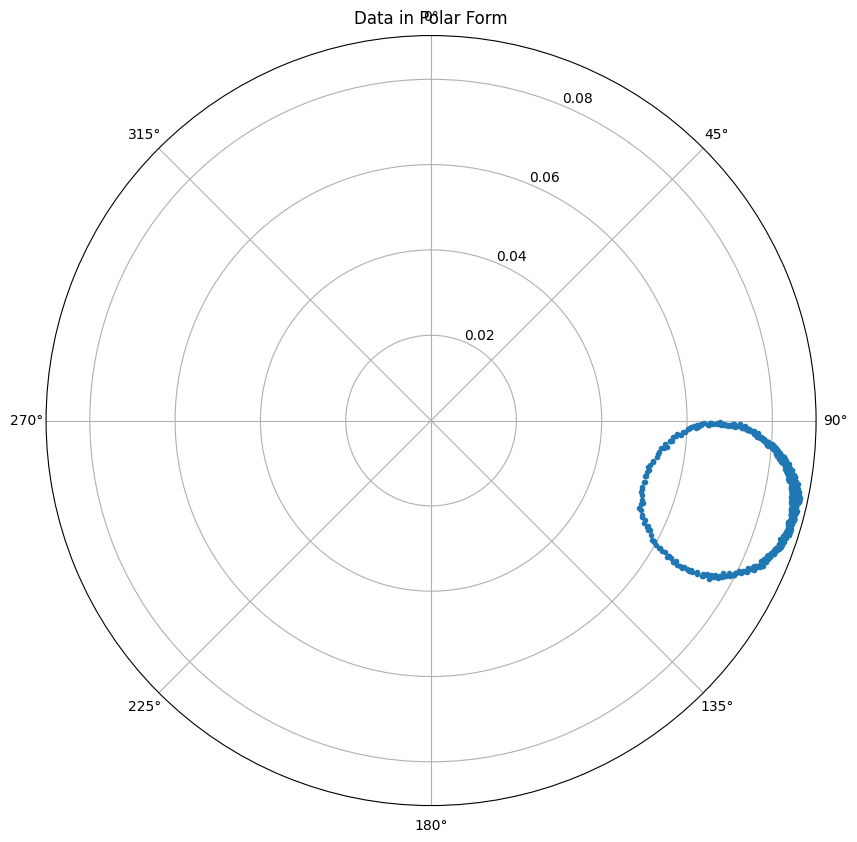

In [3]:
# Load data
data_path = '../Data/fit_test/Q_res20.txt'
data = np.loadtxt(data_path, delimiter=',', skiprows=0) # freq, real, imag

# Cable delay correction
delay = 28e-9  # 30 ns delay
cable_phase_factors = np.exp(-1j * 2 * np.pi * data[:,0] * delay)  # 30 ns delay
complex_data = data[:,1] + 1j * data[:,2]
complex_data = complex_data / cable_phase_factors


# Convert complex coordinates to polar form (magnitude and angle)
r_values = np.abs(complex_data)  # Magnitude
theta = np.angle(complex_data)  # Angle

# Create polar plot
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)
ax.plot(theta, r_values, '.')  # Plot points in polar coordinates
ax.set_title('Data in Polar Form', va='bottom')

# Additional aesthetic settings for matching your provided plot style
ax.grid(True)
ax.set_theta_zero_location('N')  # Set the zero of the theta direction (north)
ax.set_theta_direction(-1)  # Set the direction of increasing theta (clockwise)

# Optional: set the radial limits if necessary
# ax.set_rlim(0, np.max(r))

plt.show()

eta:  0.0002989048832117041
Center of circle: (-0.11990379913086768, 0.4592544500925974)
Radius of circle: 0.4795571378146938


C:\Users\kid\AppData\Local\Temp\ipykernel_16576\3896980404.py:46: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  A = fsolve(cherno_lesort_fit, initial_guess, args=(B, M, eta))


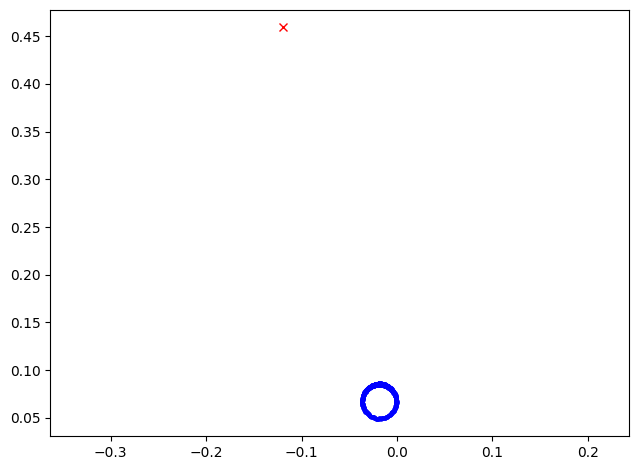

In [5]:
# Chernov-Lesort fit ----------------

# B matrix
B = np.array([
    [0, 0, 0, -2],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [-2, 0, 0, 0]
])

# M matrix
w = np.abs(complex_data)
x = np.real(complex_data)
y = np.imag(complex_data)
M_ab = lambda a, b: np.sum(a * b)
M = np.array([
    [M_ab(w, w), M_ab(x, w), M_ab(y, w), M_ab(w, np.ones_like(w))],
    [M_ab(w, x), M_ab(x, x), M_ab(y, x), M_ab(x, np.ones_like(x))],
    [M_ab(w, y), M_ab(x, y), M_ab(y, y), M_ab(y, np.ones_like(y))],
    [M_ab(w, np.ones_like(w)), M_ab(x, np.ones_like(x)), M_ab(y, np.ones_like(y)), len(w)]
])

def lagrange_det(eta, B, M):
    return np.linalg.det(M - eta * B)

# Find zeros of the determinant to find eta
from scipy.optimize import fsolve
eta = fsolve(lagrange_det, 0, args=(B, M))
eta = eta[0]
print('eta: ', eta)

# Solve numerically: MA - eta*BA = 0 ( A = [A, B, C, D] )
# With constraint: B^2 + C^2 - 4AD = 1
def cherno_lesort_fit(A, B, M, eta):
    term1 = M @ A
    term2 = eta * B @ A
    return term1 - term2

def satisfy_constraint(A):
    # check if constraint is close enough to 1
    return np.isclose(np.abs(A[1])**2 + np.abs(A[2])**2 - 4 * A[0] * A[3], 1, atol=1e-3)

constraint_satisfied = False
while not constraint_satisfied:
    initial_guess = np.random.rand(4, 1)  # Random initial guess
    A = fsolve(cherno_lesort_fit, initial_guess, args=(B, M, eta))
    constraint_satisfied = satisfy_constraint(A)

# Compute circle parameters
x_c = -A[1] / (2 * A[0])
y_c = -A[2] / (2 * A[0])
r = 1 / (2 * np.abs(A[0]))

print('Center of circle: ({}, {})'.format(x_c, y_c))
print('Radius of circle: {}'.format(r))

# Plot data and fit in polar coordinates
# plt.figure(figsize=(10, 10))
# ax = plt.subplot(111, polar=True)
# ax.plot(theta, r_values, '.')  # Plot points in polar coordinates
# # Plot fit
# theta_fit = np.linspace(0, 2*np.pi, 100)
# # circle_fit = r * np.exp(1j * theta_fit) + x_c + 1j * y_c
# # ax.plot(np.angle(circle_fit), np.abs(circle_fit), 'r')
# # Put a 'x' at the center of the circle
# center_of_circle = x_c + 1j * y_c
# plt.plot(np.angle(center_of_circle), np.abs(center_of_circle), 'rx')


plt.scatter(x, y, c='b', s=5, label='Data')
plt.plot(x_c, y_c, 'rx', label='Center of circle')
# set same aspect ratio
plt.axis('equal')
plt.tight_layout()

Eigenvalue (eta): 0.00031978819216674773
Eigenvector (A): [-0.72485936 -0.42845347 -0.53943979  0.00335446]
Circle Center: (-0.29554248051988985, -0.37209962331123075)
Radius: 0.4800325295168603


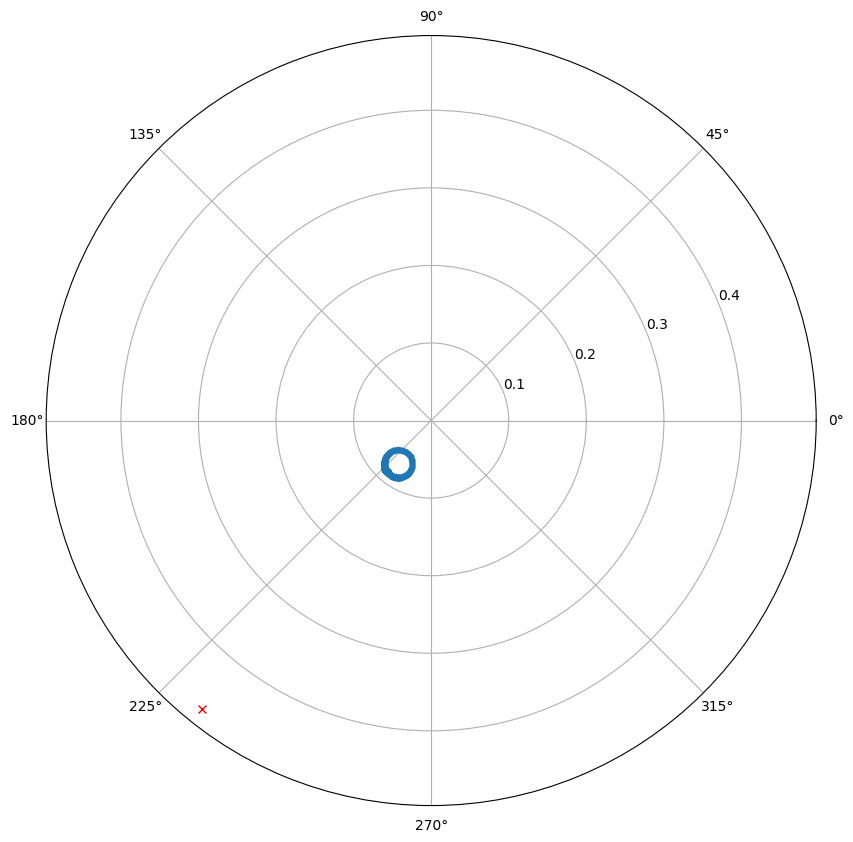

In [ ]:
import numpy as np
from scipy.linalg import eig

# Ensure complex_data is defined as a NumPy array of complex numbers
# Example:
# complex_data = np.array([1+2j, 2+3j, 3+4j, ...])

# Chernov-Lesort fit ----------------

# B matrix
B = np.array([
    [0, 0, 0, -2],
    [0, 1, 0, 0],
    [0, 0, 1, 0],
    [-2, 0, 0, 0]
])

# M matrix
w = np.abs(complex_data)
x = np.real(complex_data)
y = np.imag(complex_data)

def M_ab(a, b):
    return np.sum(a * b)

M = np.array([
    [M_ab(w, w), M_ab(x, w), M_ab(y, w), M_ab(w, np.ones_like(w))],
    [M_ab(w, x), M_ab(x, x), M_ab(y, x), M_ab(x, np.ones_like(x))],
    [M_ab(w, y), M_ab(x, y), M_ab(y, y), M_ab(y, np.ones_like(y))],
    [M_ab(w, np.ones_like(w)), M_ab(x, np.ones_like(x)), M_ab(y, np.ones_like(y)), len(w)]
])

# Solve the generalized eigenvalue problem M * A = eta * B * A
eigvals, eigvecs = eig(M, B)

# Filter out eigenvalues that are not real
real_indices = np.isreal(eigvals)
real_eigvals = eigvals[real_indices].real
real_eigvecs = eigvecs[:, real_indices].real

# Check if there are any real eigenvalues
if real_eigvals.size == 0:
    raise ValueError("No real eigenvalues found. Check the input data or matrices.")

# Select the eigenvalue with the smallest positive real part (or another criterion)
# Here, we select the eigenvalue with the smallest absolute value
eta_index = np.argmin(np.abs(real_eigvals))
eta = real_eigvals[eta_index]

# Extract the corresponding eigenvector
A = real_eigvecs[:, eta_index]

# Normalize the eigenvector (optional, for consistency)
A = A / np.linalg.norm(A)

print("Eigenvalue (eta):", eta)
print("Eigenvector (A):", A)

# Compute circle parameters based on the eigenvector A
# Assuming the circle equation: A0*(x^2 + y^2) + A1*x + A2*y + A3 = 0
A0, A1, A2, A3 = A

# Calculate the center of the circle
x_c = -A1 / (2 * A0)
y_c = -A2 / (2 * A0)

# Calculate the radius of the circle
# r = sqrt(x_c^2 + y_c^2 - A3 / A0)
radius_squared = x_c**2 + y_c**2 - (A3 / A0)
if radius_squared < 0:
    raise ValueError("Calculated radius squared is negative. Check the fitting results.")
r = np.sqrt(radius_squared)

print(f"Circle Center: ({x_c}, {y_c})")
print(f"Radius: {r}")

# Plot data and fit in polar coordinates
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)
ax.plot(theta, r_values, '.')  # Plot points in polar coordinates


center_of_circle = x_c + 1j * y_c
plt.plot(np.angle(center_of_circle), np.abs(center_of_circle), 'rx')
